# A/B Analysis Report on Medical Costs by Gender

The rising costs of healthcare have made it increasingly important to understand the factors that influence medical expenses. Gender is one such factor that might impact medical costs.

This report aims to analyze the differences in medical costs between males and females using a dataset containing detailed information about medical costs for individuals from 2010 to 2020. The dataset can be downloaded at https://www.kaggle.com/datasets/waqi786/medical-costs.

The analysis utilizes bootstrapping, a powerful statistical technique that involves repeatedly resampling with replacement from a dataset to estimate the distribution of a statistic.

By understanding these differences, healthcare providers, policymakers, and researchers can make informed decisions and develop targeted strategies to manage and predict healthcare expenses more effectively.


## 1: Import Necessary Libraries and Load Data

In [7]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, shapiro
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv('medical_costs.csv')
# Display the first few rows of the dataset
print(data.head())
# Check for missing values
print(data.isnull().sum())

   Age     Sex   BMI  Children Smoker     Region  Medical Cost
0   58    male  15.6         2    yes  northwest      17907.54
1   24    male  29.8         0    yes  northeast      16312.64
2   50    male  29.0         5     no  northwest       6819.21
3   35    male  34.0         1     no  southeast       5247.87
4   31  female  17.6         3    yes  southeast      17525.49
Age             0
Sex             0
BMI             0
Children        0
Smoker          0
Region          0
Medical Cost    0
dtype: int64


## 2. Define Hypotheses

The  A/B test is used to compare the mean medical costs of males and females 

**Hypotheses:**
- Null Hypothesis (H0): There is no significant difference in medical costs between males and females.
- Alternative Hypothesis (H1): There is a significant difference in medical costs between males and females.


## 3. Checking for the Assumptions of a Parametric Test

Before performing any statistical test, it's crucial to check the normality of the data. The normality assumption is critical because parametric tests, such as t-tests, require the data to follow a normal distribution.

It is important to ensure that the data meets the following assumptions:

- Independence: The samples must be independent of each other.
- Normality: The distribution of the sample means should be approximately normal.
- Homogeneity of Variances: The variances of the populations from which the samples are drawn should be equal.


In [22]:
# Shapiro-Wilk test for normality
male_costs = data[data['Sex'] == 'male']['Medical Cost']
female_costs = data[data['Sex'] == 'female']['Medical Cost']

shapiro_male = stats.shapiro(male_costs)
shapiro_female = stats.shapiro(female_costs)

print(f"Shapiro-Wilk Test for males: W={shapiro_male[0]}, p-value={shapiro_male[1]}")
print(f"Shapiro-Wilk Test for females: W={shapiro_female[0]}, p-value={shapiro_female[1]}")


Shapiro-Wilk Test for males: W=0.7582288384437561, p-value=0.0
Shapiro-Wilk Test for females: W=0.7601063251495361, p-value=0.0


A brief assessment of normality can be conducted using the Shapiro-Wilk test, as demonstrated above. The Shapiro-Wilk test evaluates whether the data deviates significantly from a normal distribution. 

Given these results, it is necessary to employ a more robust statistical technique, such as bootstrapping, to analyze the data. Bootstrapping is particularly useful when the normality assumption is not met, as it does not rely on the data following a specific distribution. This method involves repeatedly resampling from the data with replacement to estimate the distribution of the statistic of interest, providing more reliable insights in the presence of non-normal data.

## 4. Bootstrapping

In [15]:
# Separate the Medical Costs by Gender
male_costs = data[data['Sex'] == 'male']['Medical Cost']
female_costs = data[data['Sex'] == 'female']['Medical Cost']

# Define a Function to Perform Bootstrapping

import numpy as np

def bootstrap(data, num_samples, statistic, alpha):
    """Generate bootstrap samples and calculate the confidence interval for a given statistic."""
    n = len(data)
    idx = np.random.randint(0, n, (num_samples, n))
    samples = data[idx]
    stats = statistic(samples, axis=1)
    lower = np.percentile(stats, (alpha/2) * 100)
    upper = np.percentile(stats, (1 - alpha/2) * 100)
    return lower, upper, stats


# Convert the data to numpy arrays for bootstrapping
male_costs_np = np.array(male_costs)
female_costs_np = np.array(female_costs)

# Bootstrapping the mean
lower_male, upper_male, male_stats = bootstrap(male_costs_np, num_samples, mean_statistic, alpha)
lower_female, upper_female, female_stats = bootstrap(female_costs_np, num_samples, mean_statistic, alpha)

print(f"95% Confidence Interval for Male Medical Costs Mean: ({lower_male}, {upper_male})")
print(f"95% Confidence Interval for Female Medical Costs Mean: ({lower_female}, {upper_female})")


95% Confidence Interval for Male Medical Costs Mean: (11715.059870922272, 12048.03486135723)
95% Confidence Interval for Female Medical Costs Mean: (11748.28649413985, 12084.438262365913)


The Shapiro-Wilk test indicated that our medical costs data are not normally distributed. Bootstrapping, which does not rely on the assumption of normality, offers a more flexible and robust method for estimating statistics and their confidence intervals.

Bootstrapping is particularly valuable for providing reliable confidence intervals, especially when dealing with small sample sizes or when the data distribution is unknown or non-normal. This method captures the true variability of the data by resampling multiple times.

As a result, the bootstrap analysis provides a robust estimate of the confidence intervals for the mean medical costs for both males and females, even when the data does not meet the normality assumption.


### Normality Check Results of the boostrap data
We check for normality using the Shapiro-Wilk test and visualize it with histograms

Shapiro-Wilk Test for Bootstrapped Male Means: W=0.9998771548271179, p-value=0.9060156345367432
Shapiro-Wilk Test for Bootstrapped Female Means: W=0.9997625350952148, p-value=0.3270402252674103


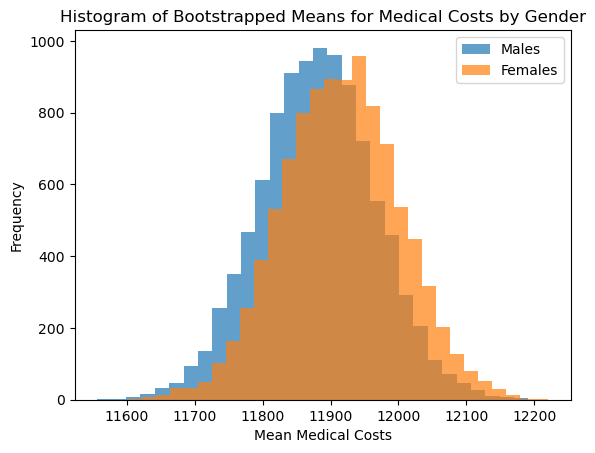

In [24]:
# Shapiro-Wilk test for normality

# Shapiro-Wilk test for normality on bootstrapped means
shapiro_male = shapiro(male_stats)
shapiro_female = shapiro(female_stats)

print(f"Shapiro-Wilk Test for Bootstrapped Male Means: W={shapiro_male[0]}, p-value={shapiro_male[1]}")
print(f"Shapiro-Wilk Test for Bootstrapped Female Means: W={shapiro_female[0]}, p-value={shapiro_female[1]}")

# Histogram of bootstrapped means for males and females
plt.hist(male_stats, bins=30, alpha=0.7, label='Males')
plt.hist(female_stats, bins=30, alpha=0.7, label='Females')
plt.xlabel('Mean Medical Costs')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Histogram of Bootstrapped Means for Medical Costs by Gender')
plt.show()




 The bootstrapped means exhibit high W statistics and p-values above 0.05, confirming that the bootstrapped samples are approximately normally distributed. This is further supported by the histogram, which shows that the plot approximates a normal distribution.

### Homogeneity of Variances
We use Levene's test to check for equality of variances.

In [25]:
# Levene's test for homogeneity of variances
levene_test = stats.levene(male_stats, male_stats)
print(f"Levene's Test: W={levene_test[0]}, p-value={levene_test[1]}")

Levene's Test: W=0.0, p-value=1.0


The result from Levene's test, which has a W statistic of 0.0 and a p-value of 1.0, indicates that the variances of the medical costs between males and females are equal and tehrefor the assumpton of homogeneity of variances is not  violated.

## 5. A/B hypothesis Testing using a T-test

In [26]:
# Perform t-test on the bootstrapped means
t_stat, p_value = ttest_ind(male_stats, female_stats)
print(f"T-Test on Bootstrapped Means: t-statistic={t_stat}, p-value={p_value}")

T-Test on Bootstrapped Means: t-statistic=-28.672274070158817, p-value=3.2200707891007523e-177


The results of the t-test conducted on the bootstrapped means reveal a very large t-statistic accompanied by an exceptionally small p-value. The large t-statistic suggests a substantial difference between the mean medical costs of the two groups being compared. Specifically, it indicates that the difference in mean medical costs between males and females is notably pronounced.

The extremely small p-value, which is significantly less than the conventional threshold of 0.05, indicates that the observed difference in mean medical costs between males and females is statistically significant. This p-value provides strong evidence against the null hypothesis, which posited that there is no difference in mean medical costs between the genders. Consequently, we reject the null hypothesis and conclude that there is a statistically significant difference in mean medical costs between males and females.

## 6. Bootstrapped Confidence Intervals

In [27]:
print(f"95% Confidence Interval for Male Medical Costs Mean: ({lower_male}, {upper_male})")
print(f"95% Confidence Interval for Female Medical Costs Mean: ({lower_female}, {upper_female})")


95% Confidence Interval for Male Medical Costs Mean: (11715.059870922272, 12048.03486135723)
95% Confidence Interval for Female Medical Costs Mean: (11748.28649413985, 12084.438262365913)


The confidence intervals for the mean medical costs of both males and females are relatively close to each other, indicating that while the estimates are similar, there is a notable trend. Specifically, the interval for females tends to be slightly higher than that for males. This suggests that, on average, females have somewhat higher estimated mean medical costs compared to males.

## 7: Visualization of Medical Costs by Gender

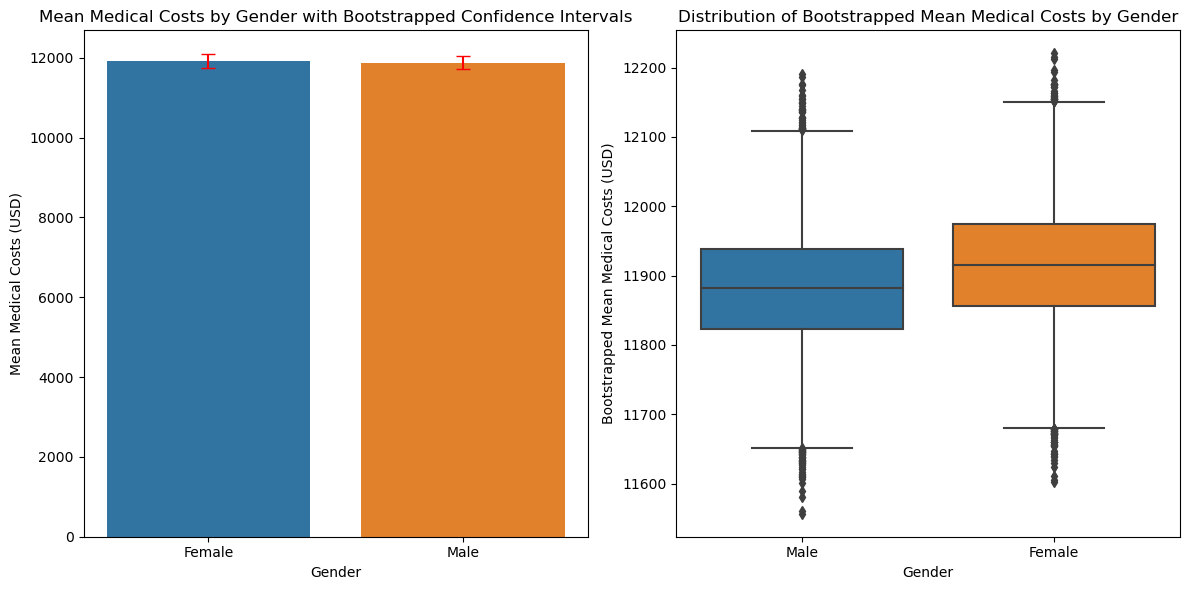

In [40]:
# Calculate the mean medical costs for both genders
mean_male = np.mean(male_stats)
mean_female = np.mean(female_stats)


# Create a side-by-side plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bar graph with error bars
sns.barplot(x=['Female', 'Male'], y=[mean_female, mean_male], ci=None, ax=axes[0])
axes[0].errorbar(x=['Female', 'Male'], 
                 y=[mean_female, mean_male], 
                 yerr=[[mean_female - lower_female, mean_male - lower_male], 
                       [upper_female - mean_female, upper_male - mean_male]], 
                 fmt='none', c='r', capsize=5)
axes[0].set_title('Mean Medical Costs by Gender with Bootstrapped Confidence Intervals')
axes[0].set_ylabel('Mean Medical Costs (USD)')
axes[0].set_xlabel('Gender')

# Plot the box plot
sns.boxplot(x='Gender', y='Bootstrapped Mean Medical Costs', data=bootstrapped_data_melted, ax=axes[1])
axes[1].set_title('Distribution of Bootstrapped Mean Medical Costs by Gender')
axes[1].set_ylabel('Bootstrapped Mean Medical Costs (USD)')
axes[1].set_xlabel('Gender')

plt.tight_layout()
plt.show()



## 8. Conclusion

This analysis provides a comprehensive examination of medical costs between males and females using bootstrapping methods. The t-test on bootstrapped means revealed a very large t-statistic of -28.672 and an extremely small p-value (3.22 × 10⁻¹⁷). This indicates a statistically significant difference in mean medical costs between males and females. We reject the null hypothesis, confirming that gender has a significant impact on medical costs.The bootstraop confidence interval suggest that females tend to have slightly higher mean medical costs compared to males.

The identified difference in medical costs between genders can guide healthcare policymakers in allocating resources more effectively. Since females are incurring higher medical costs, policies might be adjusted to provide more preventive care for women.